# Some Classic Paleoclimate Figures

## LR04 Stack
The LR04 Benthic isotope stack (Lisiecki and Raymo 2005) is one of the most iconic datasets in paleoclimate. It documents the long-term increase in $\delta$<sup>18</sup>O which is a proxy for temperature and ice volume. It also highlights the change between domination by ~41 thousand year periodicity before 1.25 Ma and domination by ~100 thousand year periodicity since 700 ka.

In [363]:
#Need to import a lot of modules... this will take a while
# Large, general packages
import numpy as np
import pylab as plt
import pandas as pd
# Specific packages
import scipy.ndimage as ndimage
import scipy.signal as signal
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import statsmodels.api as sm
import matplotlib.patches as patches
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

In [2]:
#Import the LR04 stack data
lr2004=np.genfromtxt('/homes/dcw32/Obs/lr2004/stack.txt',skip_header=5)

In [3]:
print lr2004.shape
print lr2004[-1,0]

(2115, 3)
5320.0


In [4]:
# Extract required data from the data array
ages=lr2004[:,0]/1000 # Convert to millions of years ago
d18O=lr2004[:,1] #d18O data
err=lr2004[:,2] #standard error

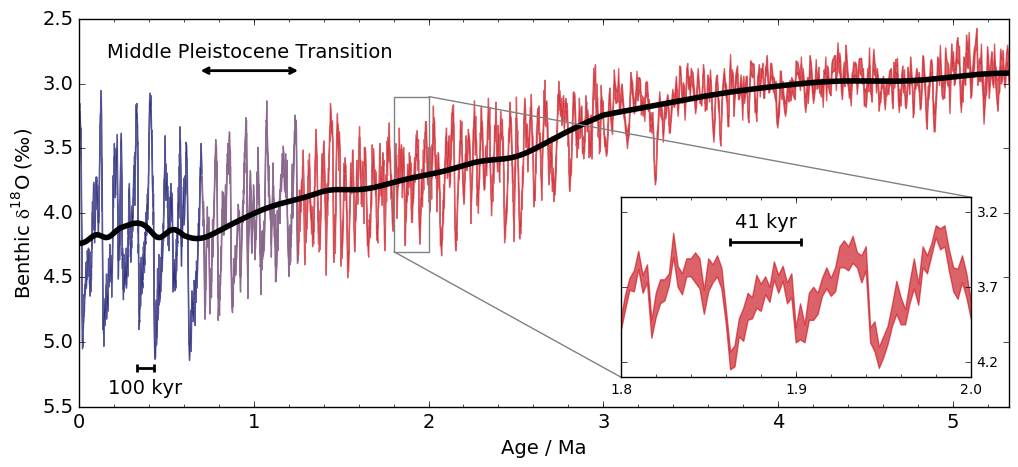

In [498]:
t1=1.25
t2=0.7
t3=0.43
t4=t3-0.10
t5=1.903
t6=t5-0.041
fig=plt.figure(figsize=(12,5))
#plt.plot(ages,d18O,c='k',linewidth=1,linestyle=':')
ax=fig.add_subplot(111)
d18O_fil=ndimage.filters.gaussian_filter1d(d18O, 10.0)
d18O_fil2=ndimage.filters.gaussian_filter1d(d18O, 50.0)
#d18O_fil=signal.savgol_filter(d18O,1251,3)
#plt.plot(ages,d18O_fil,c='k',linewidth=1,linestyle='--')
#plt.yticks(visible=False)
#plt.xticks(visible=False)
plt.plot(ages,d18O_fil2,c='k',linewidth=4)
plt.fill_between(ages[ages>=t1], (d18O-err)[ages>=t1], (d18O+err)[ages>=t1], color='#CE2029', alpha=0.7)
plt.fill_between(ages[np.logical_and(ages > t2, ages < t1)], (d18O-err)[np.logical_and(ages > t2, ages < t1)], (d18O+err)[np.logical_and(ages > t2, ages < t1)], color='#856088', alpha=0.9)
plt.fill_between(ages[ages<=t2], (d18O-err)[ages<=t2], (d18O+err)[ages<=t2], color='#191970', alpha=0.7)
#plt.errorbar((t1+t2)/2.,2.95,xerr=(t1-t2)/2.,color='k',linewidth=2,capthick=2,xuplims=True,xlolims=True)
#plt.errorbar((t1+t2)/2.,2.95,xuplims=t1,xlolims=t2,color='k')
plt.annotate(
    '', xy=(t1+0.02, 2.9), xycoords='data',
    xytext=(t2-0.02, 2.9), textcoords='data',
    arrowprops=dict(arrowstyle='<->',facecolor='black',lw=2)
    )
plt.errorbar((t3+t4)/2.,5.2,xerr=(t3-t4)/2.,color='k',linewidth=2,capthick=2)
plt.xlabel('Age / Ma',fontsize=14)
plt.ylabel(r'Benthic $\mathregular{\delta ^{18}O\>(\perthousand)}$',fontsize=14)
ax.annotate('Middle Pleistocene Transition',xy=((t1+t2)/2.,2.80),horizontalalignment='center',fontsize=14)
ax.annotate('100 kyr',xy=((t3+t4)/2.,5.4),horizontalalignment='center',fontsize=14)
#ax.annotate('LR04 stack (Lisiecki and Raymo, 2005)',xy=(1.0,1.02),horizontalalignment='right',xycoords='axes fraction',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))
plt.xlim(0,5.32)
plt.ylim(2.5,5.5)
plt.gca().invert_yaxis()
axins = inset_axes(ax, 3.5,1.8 , loc=2,bbox_to_anchor=(0.57, 0.56),bbox_transform=ax.figure.transFigure) # no zoom
#axins = zoomed_inset_axes(ax, 2.5, loc=2)
axins.set_xlim(1.8,2.0)
axins.set_ylim(3.1,4.3)
axins.fill_between(ages[ages>=t1], (d18O-err)[ages>=t1], (d18O+err)[ages>=t1], color='#CE2029', alpha=0.7)
axins.errorbar((t5+t6)/2.,3.4,xerr=(t5-t6)/2.,color='k',linewidth=2,capthick=2)
axins.annotate('41 kyr',xy=((t5+t6)/2.,3.30),horizontalalignment='center',fontsize=14)
axins.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))
plt.gca().invert_yaxis()
plt.yticks([3.2,3.7,4.2])
plt.xticks([1.8,1.9,2.0],['1.8','1.9','2.0'])
axins.yaxis.tick_right()
axins.yaxis.set_ticks_position('both')
new=mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.savefig('/homes/dcw32/figures/lr2004.png',dpi=200,bbox_inches='tight')
plt.show()

### 

## The Zachos Curve

In [6]:
#Read in the Zachos data--> Use pandas because it's more flexible to read in
#However, have to set specific widths for columns - would suggest reading the documentation for this!
za2001=pd.read_fwf(r'/homes/dcw32/Obs/zachos2001/zachos2001.txt',skiprows=88,colspecs=[(0,8),(9,22),(23,38),(39,50),(51,61),(62,72),(73,83)])
#SITE, AGE(Ma), Genus, d18O(adj), d13C, d18O(5pt running mean), d13C(5pt running mean)

In [7]:

print za2001

      SITE***  Age (Ma   Genus  d18O adj  *     d13C  d18O(5pt  *)  d13C(5
0         607   0.0000     CIB      3.28        0.88       NaN         NaN
1         849   0.0000     CIB      3.58        0.15       NaN         NaN
2         607   0.0020     CIB      3.16        0.96     3.252        0.72
3         659   0.0020     CIB      2.91         NaN     3.228        0.66
4         607   0.0040     CIB      3.33        0.88     3.228        0.67
5         659   0.0040     CIB      3.16         NaN     3.328        0.58
6         849   0.0040     CIB      3.58        0.17     3.392         NaN
7         607   0.0059     CIB      3.66        0.70     3.320        0.38
8         659   0.0060     CIB      3.23         NaN     3.334         NaN
9         806   0.0070     CIB      2.97        0.27     3.360        0.34
10        659   0.0080     CIB      3.23         NaN     3.268        0.17
11        849   0.0080     CIB      3.71        0.06     3.244        0.20
12        659   0.0100   

In [8]:
zatoplot=pd.DataFrame.as_matrix(za2001)[:14887,:]

In [477]:
def d18o2T(input):
    T=16.5-4.3*input+0.14*input**2
    return T
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None

In [44]:
bounds=[66.0,54.9,33.6,23.03,5.333,2.58,0.]
mids=np.zeros(len(bounds)-1)
for i in range(len(mids)):
    mids[i]=(0.5*(bounds[i]+bounds[i+1]))/70.
labs=['Paleocene','Eocene','Oligocene','Miocene','Plio.','Plt.']

float64


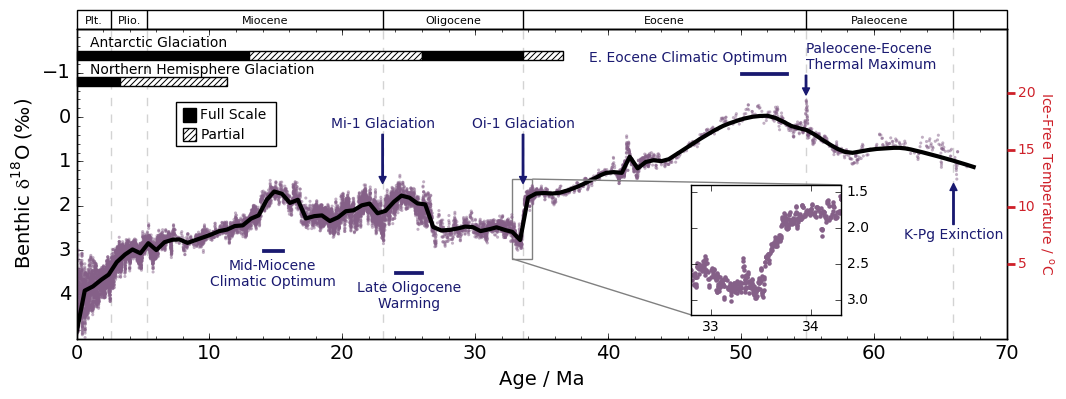

In [497]:
xlo=0.
xup=70.
ylo=-2.
yup=5.
const=0.06*(yup-ylo)
const2=0.03*(yup-ylo)
#Start plotting
#fig=plt.figure(figsize=(12,4))
#ax=fig.add_subplot(111)
#ax=host_subplot(111,axes_class=AA.Axes)
fig,ax=plt.subplots(figsize=(12,4))
#
ax2 = ax.twinx()
ax2.set_ylim(d18o2T(yup),d18o2T(ylo))
ax2.set_yticks([5.,10.,15.,20.])
color_y_axis(ax2, '#CE2029')
ax2.get_yaxis().set_tick_params(direction='out',width=2,length=6,colors='#CE2029')
t_ap=ax2.set_ylabel(r'Ice-Free Temperature / $\mathregular{^{o}}$C',fontdict={'color':'#CE2029'},labelpad=15)
t_ap.set_rotation(270.)
#
plt.sca(ax)
for i in range(len(bounds)-1):
    plt.axvline(bounds[i],c='lightgray',linestyle='--',zorder=1)
vals=zatoplot[:,3]
vals=vals.astype(float)
tims=zatoplot[:,1]
print vals.dtype
#d18O_fil=ndimage.filters.gaussian_filter1d(vals, 500.0)
#d18O_fil=signal.savgol_filter(vals,151,3)
#lowess1 = sm.nonparametric.lowess(vals[tims<25.], tims[tims<25.], frac=0.1)
lowess1 = sm.nonparametric.lowess(vals, tims, frac=0.01,delta=0.6)
lowess2 = sm.nonparametric.lowess(vals[tims>25.], tims[tims>25.], frac=0.05)
#d18O_fil=lowess(zatoplot[:-1,1],zatoplot[:-1,3])
plt.scatter(zatoplot[2:-2,1],zatoplot[2:-2,5],marker='.',c='#856088',alpha=0.5,edgecolors='none',zorder=999)
plt.axis([xlo, xup, ylo, yup])
#plt.hexbin(zatoplot[2:-2,1], zatoplot[2:-2,5], cmap=plt.cm.get_cmap('viridis_r'), mincnt=1, gridsize=300,bins='log',extent=(0,65,-1,5))
#plt.hexbin(zatoplot[2:-2,1], zatoplot[2:-2,5], color='r', mincnt=1, gridsize=300,bins='log',extent=(0,65,-1,5))
#plt.plot(zatoplot[:-1,1],d18O_fil,c='k')
plt.plot(lowess1[:,0],lowess1[:,1],c='k',linewidth=3,zorder=1000)
#plt.plot(lowess2[:,0],lowess2[:,1],c='k',linewidth=2)
#plt.ylim(-1.,5.)
#plt.xlim(0.,67.5172)
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.2))
plt.yticks([-1,0,1,2,3,4])
plt.gca().invert_yaxis()
plt.xlabel('Age / Ma',fontsize=14)
plt.ylabel(r'Benthic $\mathregular{\delta ^{18}O\>(\perthousand)}$',fontsize=14)
#ax.annotate('Zachos et al, 2001',xy=(1.0,1.08),horizontalalignment='right',xycoords='axes fraction',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2.))
#
########################
#Arrows and Labels
########################
ax.annotate('K-Pg Exinction', xy=(bounds[0], 1.5), xytext=(bounds[0], 2.5), color='#191970',
            arrowprops=dict(color='#191970',width=1,headwidth=5,headlength=5),
            horizontalalignment='center', verticalalignment='top')
ax.annotate('Paleocene-Eocene\nThermal Maximum', xy=(bounds[1], -0.5), xytext=(bounds[1], -1.7),
            arrowprops=dict(color='#191970',width=1,headwidth=5,headlength=5), color='#191970',
            horizontalalignment='left', verticalalignment='top')
ax.annotate('Oi-1 Glaciation', xy=(bounds[2], 1.5), xytext=(bounds[2], 0.),
            arrowprops=dict(color='#191970',width=1,headwidth=5,headlength=5), color='#191970',
            horizontalalignment='center', verticalalignment='top')
ax.annotate('Mi-1 Glaciation', xy=(bounds[3], 1.5), xytext=(bounds[3], 0.),
            arrowprops=dict(color='#191970',width=1,headwidth=5,headlength=5), color='#191970',
            horizontalalignment='center', verticalalignment='top')
ax.add_patch(patches.Rectangle((50, -1.),3.5,0.02,color='#191970',lw=2))
ax.annotate('E. Eocene Climatic Optimum', xy=(53.5, -1.5),color='#191970',horizontalalignment='right', verticalalignment='top')
ax.add_patch(patches.Rectangle((14, 3.),1.5,0.02,color='#191970',lw=2))
ax.annotate('Mid-Miocene\nClimatic Optimum', xy=(14.75, 3.2),color='#191970',horizontalalignment='center', verticalalignment='top')
ax.add_patch(patches.Rectangle((24., 3.5),2.,0.02,color='#191970',lw=2))
ax.annotate('Late Oligocene\nWarming', xy=(25., 3.7),color='#191970',horizontalalignment='center', verticalalignment='top')
#Antarctic Glaciation
ax.add_patch(patches.Rectangle((0, -1.5),13,0.2,facecolor='k',clip_on=False,zorder=2))
ax.add_patch(patches.Rectangle((13, -1.5),13,0.2,hatch='////',facecolor='w',clip_on=False,zorder=2))
ax.add_patch(patches.Rectangle((26, -1.5),bounds[2]-26,0.2,facecolor='k',clip_on=False,zorder=2))
ax.add_patch(patches.Rectangle((bounds[2], -1.5),3.,0.2,hatch='////',facecolor='w',clip_on=False,zorder=2))
ax.annotate('Antarctic Glaciation', xy=(1.0, -1.51),color='k',horizontalalignment='left', verticalalignment='bottom')
#N Hemi
ax.add_patch(patches.Rectangle((0, -0.9),3.3,0.2,facecolor='k',clip_on=False,zorder=2))
ax.add_patch(patches.Rectangle((3.3, -0.9),8.,0.2,hatch='////',facecolor='w',clip_on=False,zorder=2))
ax.annotate('Northern Hemisphere Glaciation', xy=(1.0, -0.91),color='k',horizontalalignment='left', verticalalignment='bottom')
#Add the Epoch names
ax.add_patch(patches.Rectangle((xlo, ylo-const),xup-xlo,const,clip_on=False,fill=False))
#Legend
ax.add_patch(patches.Rectangle((7.5, -0.35),7.5,1,clip_on=False,fill=False))
ax.add_patch(patches.Rectangle((8, -0.2),1.,0.3,facecolor='k',clip_on=False,zorder=2))
ax.add_patch(patches.Rectangle((8, .25),1.,0.3,hatch='////',facecolor='w',clip_on=False,zorder=2))
ax.annotate('Full Scale', xy=(9.3, -0.2),color='k',horizontalalignment='left', verticalalignment='top',fontsize=10)
ax.annotate('Partial', xy=(9.3, .25),color='k',horizontalalignment='left', verticalalignment='top',fontsize=10)
for i in range(len(mids)):
    ax.annotate(labs[i],xy=(mids[i],1.015),xycoords='axes fraction',horizontalalignment='center',fontsize=8)
    ax.add_patch(patches.Rectangle((bounds[i], ylo-const),0.,const,clip_on=False,fill=False))
########################
#Now add the EOT inset
########################
axins = inset_axes(ax, 1.5,1.3 , loc=2,bbox_to_anchor=(0.63, 0.53),bbox_transform=ax.figure.transFigure) # no zoom
axins.set_xlim(32.8,34.3)
axins.set_ylim(1.4,3.2)
axins.scatter(zatoplot[2:-2,1], zatoplot[2:-2,5],marker='.',color='#856088',alpha=1.0)
plt.gca().invert_yaxis()
plt.xticks([33,34])
axins.yaxis.tick_right()
axins.yaxis.set_ticks_position('both')
new=mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
#
# Now add the dummy T axis
#
#par2.set_yticks([5.,10.,15.,20.])
#Save
#plt.gca().get_xticklabels().set_color('red') 
plt.savefig('/homes/dcw32/figures/zachos.png',dpi=200,bbox_inches='tight')
plt.show()

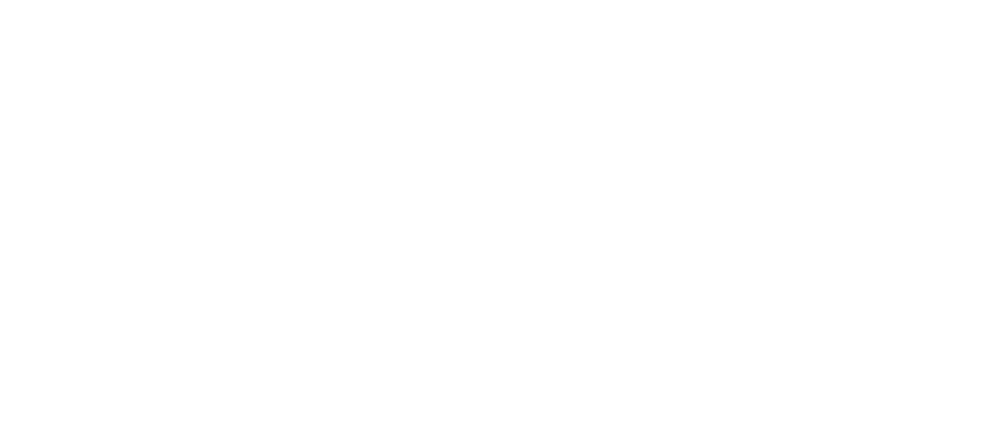

In [426]:
fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot(111)
plt.scatter(zatoplot[2:-2,1], zatoplot[2:-2,5],color='white',marker='.')
plt.xlim(0,70)
plt.gca().invert_yaxis()
plt.axis('off')
plt.savefig('/homes/dcw32/figures/cover.png',transparent=True)
plt.show()

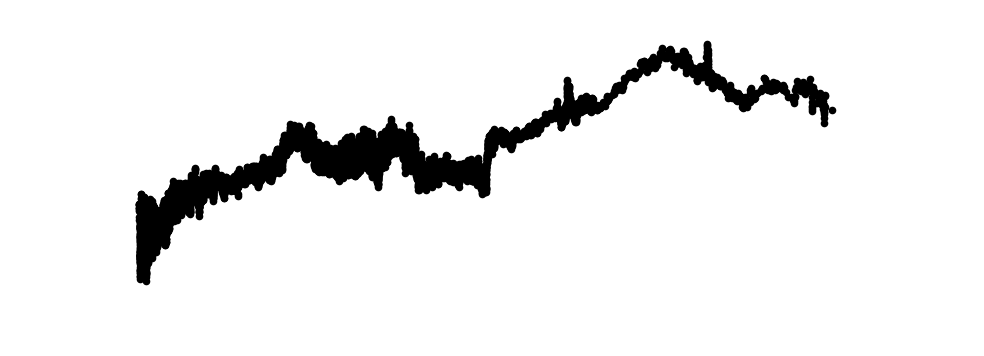

In [427]:
fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)
#plt.plot(ages,d18O,c='k',linewidth=1)
plt.scatter(zatoplot[2:-2,1], zatoplot[2:-2,5],color='k')
#plt.xlim(0,70)
plt.gca().invert_yaxis()
plt.axis('off')
plt.savefig('/homes/dcw32/figures/cover2.png',transparent=True)
plt.show()

In [428]:
#Import the Petit d18O data
petit_d18o=np.genfromtxt('/homes/dcw32/Obs/petit1999/o18nat.txt',skip_header=155)
petit_co2=np.genfromtxt('/homes/dcw32/Obs/petit1999/co2nat.txt',skip_header=155)
petit_ch4=np.genfromtxt('/homes/dcw32/Obs/petit1999/ch4nat.txt',skip_header=86)
petit_dnat=np.genfromtxt('/homes/dcw32/Obs/petit1999/deutnat.txt',skip_header=111)

In [429]:
def overlap_plot(xs,ys,overlap=0.1):
    

IndentationError: expected an indented block (<ipython-input-429-65ade8086c66>, line 2)

In [ ]:
d18o_gage=petit_d18o[:,0]/1000.
d18o_vals=petit_d18o[:,1]
co2_gage=petit_co2[:,0]/1000.
co2_vals=petit_co2[:,1]
ch4_gage=petit_ch4[:,0]/1000.
ch4_vals=petit_ch4[:,1]
dnat_age=petit_dnat[:,1]/1000. #kyr
dnat_deu=petit_dnat[:,2]
dnat_ts=petit_dnat[:,3]

In [ ]:
#nvals=5
#overlap=0.1
#for i in range(nvals):
#    minval=i-overlap
#    maxval=i+overlap
#    
fig=plt.figure()
gs1=gridspec.GridSpec(3,1)
gs1.update(hspace=-0.0)

ax0=plt.subplot(gs1[0])
ax0.spines['bottom'].set_visible(False)
ax0.xaxis.set_ticks_position('top')
ax0.xaxis.set_ticklabels([])

ax1=ax0.twinx()
#ax1=plt.subplot(gs1[1])
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.xaxis.set_ticks_position('none')
ax1.xaxis.set_ticklabels([])
plt.gca().invert_yaxis()

#ax2=plt.subplot(gs1[2])
ax2=plt.subplot(gs1[1])
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.xaxis.set_ticks_position('none')
ax2.xaxis.set_ticklabels([])

ax3=ax2.twinx()
#ax3=plt.subplot(gs1[3])
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.xaxis.set_ticks_position('none')
ax3.xaxis.set_ticklabels([])

#ax4=plt.subplot(gs1[4])
ax4=plt.subplot(gs1[2])
ax4.spines['top'].set_visible(False)
ax4.xaxis.set_ticks_position('bottom')

ax0.plot(dnat_age,dnat_deu,c='red',clip_on=False,zorder=2,alpha=0.75)
ax4.plot(dnat_age,dnat_ts,c='orange',clip_on=False,zorder=2,alpha=0.75)
ax2.plot(co2_gage,co2_vals,c='black',clip_on=False,zorder=2,alpha=0.75)
ax3.plot(ch4_gage,ch4_vals,c='purple',clip_on=False,zorder=2,alpha=0.75)
ax1.plot(d18o_gage,d18o_vals,c='pink',clip_on=False,zorder=2,alpha=0.75)
#ax1.set_ylim(-9,0)

plt.show()

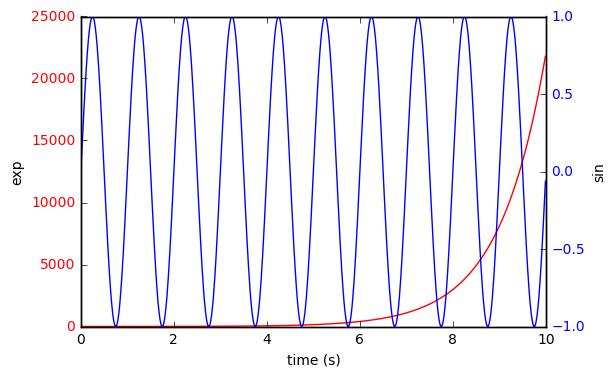

In [467]:
import numpy as np
import matplotlib.pyplot as plt


def two_scales(ax1, time, data1, data2, c1, c2):
    """

    Parameters
    ----------
    ax : axis
        Axis to put two scales on

    time : array-like
        x-axis values for both datasets

    data1: array-like
        Data for left hand scale

    data2 : array-like
        Data for right hand scale

    c1 : color
        Color for line 1

    c2 : color
        Color for line 2

    Returns
    -------
    ax : axis
        Original axis
    ax2 : axis
        New twin axis
    """
    ax2 = ax1.twinx()

    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('exp')

    ax2.plot(time, data2, color=c2)
    ax2.set_ylabel('sin')
    return ax1, ax2


# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)
s2 = np.sin(2 * np.pi * t)

# Create axes
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, t, s1, s2, 'r', 'b')


# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.show()